# Battle of Neighborhood - Week (2)

**Importing necessary libraries for assignment**

In [116]:
#Import necessary libraries for data analysis
import numpy as np  
import pandas as pd  
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

# library to handle JSON files
import json  
from pandas.io.json import json_normalize

# convert an address into latitude and l ongitude values
!pip install geopy 
from geopy.geocoders import Nominatim  

# library to handle requests
import requests  
 
# Matplotlib and associated plotting modules 
import matplotlib.cm as cm 
import matplotlib.colors as colors 
import seaborn as sns
import matplotlib.pyplot as plt

#import folium # map rendering library 
!pip install folium 
import folium 

print('Libraries imported successfully!')

Libraries imported successfully!


**Scrape the Wikipedia page "https: //en.wikipedia .org/wiki/List_of_postal_codes_of_Canada:_M" using BeautifulSoup methodolog**

In [117]:
#Using Beautiful Soup to scrape Wikipedia page 

# import the library, indicate url and access the info in free format  
import urllib.request 
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' 
page = urllib.request.urlopen(url) 
from bs4 import BeautifulSoup 
soup = BeautifulSoup(page, "lxml") 
all_tables=soup.find_all("table") 
right_table=soup.find('table', class_='wikitable sortable') 

# loop through the rows to obtain the necessary info 
A=[] 
B=[] 
C=[] 
for row in right_table.findAll('tr'):    
    cells=row.findAll('td')    
    if len(cells)==3:        
        A.append(cells[0].find(text=True))        
        B.append(cells[1].find(text=True))        
        C.append(cells[2].find(text=True))   

# intruce pandas and dataframe and display the first few rows 
df=pd.DataFrame(A,columns=['Postal Code']) 
df['Borough']=B 
df['Neighborhood']=C 
df.head()

,Postal Code,Borough,Neighborhood
0,M1A\n,Not assigned\n,Not assigned\n
1,M2A\n,Not assigned\n,Not assigned\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"


**Postal code data preprocessing**

In [118]:
# clean the data to remove the "\n" sign from columns

df['Postal Code'] = df['Postal Code'].replace('\n','', regex=True) 
df['Borough'] = df['Borough'].replace('\n','', regex=True) 
df['Neighborhood'] = df['Neighborhood'].replace('\n','', regex=True) 
df.head(5)

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [119]:
# Remove unassigned Boroughs from the list 

index=df[df['Borough']=='Not assigned'].index 
df.drop(index,inplace=True) 
df.reset_index(drop=True,inplace=True) 
print('Output for section 1 of assignment:') 
df.head()

Output for section 1 of assignment:


,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


**Obtain the geographical coordinates of each postal code using the following csv file: http:// cocl.us/ Geospatial_data**

In [120]:
# Use the Geospatial data provided by instructors in previous lab

postal_code = "http://cocl.us/Geospatial_data" 
df_PC = pd.read_csv(postal_code) 
df_PC.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


**Merge the two data frame to obtained the desired format**

In [121]:
# Merge the two dataframes to obtain the main output

neighborhoods = pd.merge(df, df_PC, on='Postal Code', how='inner') 
neighborhoods.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [122]:
# Obtain necessary info about the data

#ID how many boroughs in the file
print('The Neighborhoods dataframe has {} boroughs and {} neighborhoods.'.format(
    len(neighborhoods['Borough'].unique()),        
    neighborhoods.shape[0]    
    ) 
)

#obtain shape of the data
neighborhoods.shape

The Neighborhoods dataframe has 10 boroughs and 103 neighborhoods.


(103, 5)

**Obtain geographical location of Toronto and areas around it**

In [123]:
# Obtain latitude and longitude of our toronto_df dataframe 
address = 'toronto, ON' 
geolocator = Nominatim(user_agent="to_explorer") 
location = geolocator.geocode(address) 
latitude = location.latitude 
longitude = location.longitude 
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


**Create a map of Toronto area for better visualization**

In [124]:
# create map of Toronto using latitude and longitude values 
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map 
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods[ 'Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):    
    label = '{}, {}'.format(neighborhood, borough)    
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(        
        [lat, lng],        
        radius=5,        
        popup=label,        
        color='green',        
        fill=True,        
        fill_color='#3186cc',        
        fill_opacity=0.9,        
        parse_html=False).add_to(map_toronto)      
map_toronto

**Define Foursquare Credentials and Version**

In [125]:
CLIENT_ID = '0PF0YB3GF5NICVPQJHKIEYFIBXCDABGTZB3VA2X2EPQGVJLP' # my Foursquare ID 
CLIENT_SECRET = 'LSYXIHWGSUO1RVXEFTT4LWGCHCQ4NIX0KB1GSYAMJ15QMQRF' # my Foursq uare Secret 
VERSION = '20180605' # Foursquare API version 
LIMIT = 100 # A default Foursquare API limit value 
print('Your credentails:') 
print('CLIENT_ID: ' + CLIENT_ID) 
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0PF0YB3GF5NICVPQJHKIEYFIBXCDABGTZB3VA2X2EPQGVJLP
CLIENT_SECRET:LSYXIHWGSUO1RVXEFTT4LWGCHCQ4NIX0KB1GSYAMJ15QMQRF


**Explore Toronto - Develop a function to search each neighborhood and create a new dataframe for Toronto venues**

In [126]:
 # Define criteria 
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit # of venues 
    radius = 500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return info for available venues
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [127]:
#Get venues for all neighborhoods in our dataset
toronto_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                latitudes=neighborhoods['Latitude'],
                                longitudes=neighborhoods['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

**Check dataframe and visualize the data**

In [128]:
 # Display first few rows of all venues in our dataframe
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [129]:
# Group the dataframe by Neighborhood
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",6,6,6,6,6,6
"Bathurst Manor, Wilson Heights, Downsview North",22,22,22,22,22,22
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
Berczy Park,55,55,55,55,55,55
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",17,17,17,17,17,17


In [130]:
# Display how may unique categories do we have in our dataframe
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 273 uniques categories.


**Explore the dataframe to identify top 10 venues; confirming Pizza Place is a frequent venue**

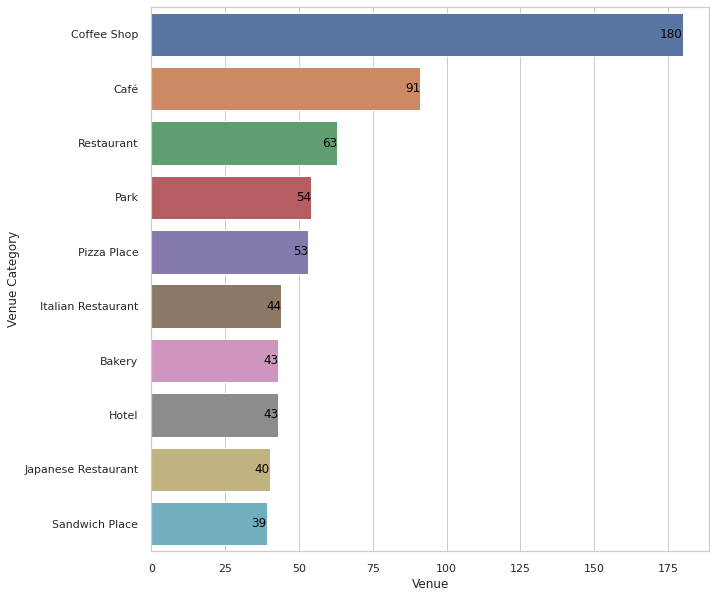

In [131]:
#Group the dataframe by Venue categories and get the frequency of each venue
top10_venues=toronto_venues.groupby('Venue Category')['Venue'].count().sort_values(ascending=False)[:10].to_frame().reset_index()

#Plot bar chart
sns.set(style="whitegrid") # Initialize the matplotlib figure 
plt.subplots(figsize=(10,10)) 
ax = sns.barplot(x='Venue', y='Venue Category', data=top10_venues) #ax.annotate(x='Venue') 
for p in ax.patches: 
    ax.text(p.get_width(), p.get_y() + p.get_height()/2., '%d' % int(p.get_width()), fontsize=12, color='black', ha='right', va='center')

*Chart suggests Pizza Place is one of the top 5 venues actually, so this is a great opportunity to open up a Pizza shop. Now the question is where?*

**Let's analyze each neighborhood in our toronto_df dataframe**

In [132]:
# one hot encoding
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to datafram
to_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

# Visualize data and obtain necessary info
print(to_onehot.shape)
to_onehot.head()

(2114, 273)


,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

**Leverage one hot encoding to group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [133]:
to_grouped = to_onehot.groupby(["Neighborhood"]).mean().reset_index()

print(to_grouped.shape)
to_grouped.head()

(96, 273)


,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,

In [134]:
pizza_df = to_grouped[["Neighborhood","Pizza Place"]]
pizza_df.head() #.head() shows the first five rows only


,Neighborhood,Pizza Place
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.333333
2,"Bathurst Manor, Wilson Heights, Downsview North",0.045455
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.043478


**Cluster available neighborhoods**

In [135]:
#Import necessary libraries for clustering
from sklearn.cluster import KMeans
import warnings 
!conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer

Solving environment: done

# All requested packages already installed.



In [136]:
to_grouped_clusters = to_grouped.drop('Neighborhood', 1)

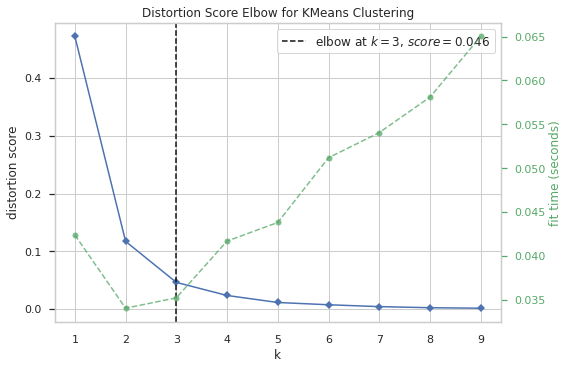

In [152]:
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,10))
visualizer.fit(to_grouped_clusters)
visualizer.poof()

*The graph suggests we can divide neighborhoods into 3 clusters*

**Looking at the figure above, it suggests that we would cluster Toronto neighborhoods into 3 clusters as identified above**

In [153]:
kclusters = 3

to_grouped_clusters = pizza_df.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(to_grouped_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int32)

**Create a new dataframe with clusters of Toronto neighborhood as well as top venues**

In [178]:
# create a new dataframe that includes the cluster as well as all the venues for each neighborhood. 
to_merged = pizza_df.copy() 

# add clustering labels 
to_merged["Cluster Labels"] = kmeans.labels_ 

# display the merged dataframe
to_merged.head()

,Neighborhood,Pizza Place,Cluster Labels
0,Agincourt,0.000000,0
1,"Alderwood, Long Branch",0.333333,2
2,"Bathurst Manor, Wilson Heights, Downsview North",0.045455,1
3,Bayview Village,0.000000,0
4,"Bedford Park, Lawrence Manor East",0.043478,1


In [179]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(toronto_venues.set_index("Neighborhood"), on="Neighborhood")


print(to_merged.shape)
to_merged.head()

(2114, 9)


,Neighborhood,Pizza Place,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.000000,0,43.794200,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
0,Agincourt,0.000000,0,43.794200,-79.262029,El Pulgarcito,43.792648,-79.259208,Latin American Restaurant
0,Agincourt,0.000000,0,43.794200,-79.262029,Twilight,43.791999,-79.258584,Lounge
0,Agincourt,0.000000,0,43.794200,-79.262029,Mark's,43.791179,-79.259714,Clothing Store
1,"Alderwood, Long Branch",0.333333,2,43.602414,-79.543484,Il Paesano Pizzeria & Restaurant,43.601280,-79.545028,Pizza Place


In [180]:
# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged.head()

(2114, 9)


,Neighborhood,Pizza Place,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.0,0,43.79420,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
59,"Parkdale, Roncesvalles",0.0,0,43.64896,-79.456325,Cider House,43.650688,-79.450685,Restaurant
59,"Parkdale, Roncesvalles",0.0,0,43.64896,-79.456325,Domani Restaurant & Wine Bar,43.649235,-79.450229,Italian Restaurant
59,"Parkdale, Roncesvalles",0.0,0,43.64896,-79.456325,Inter Steer,43.649796,-79.450310,Eastern European Restaurant
59,"Parkdale, Roncesvalles",0.0,0,43.64896,-79.456325,Revue Cinema,43.651112,-79.450961,Movie Theater


**Identify how many total Pizza Place we can find in our clusters**

In [181]:
to_merged['Venue Category'].value_counts()['Pizza Place']

53

**Create a map and observe the clusters!**

In [182]:
# create map
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))

rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Neighborhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(toronto_map)
       
toronto_map

**Examine Clusters**

In [183]:
pizza_df["Cluster Labels"] = kmeans.labels_
pizza_df.head(10)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Neighborhood,Pizza Place,Cluster Labels
0,Agincourt,0.000000,0
1,"Alderwood, Long Branch",0.333333,2
2,"Bathurst Manor, Wilson Heights, Downsview North",0.045455,1
3,Bayview Village,0.000000,0
4,"Bedford Park, Lawrence Manor East",0.043478,1
5,Berczy Park,0.000000,0
6,"Birch Cliff, Cliffside West",0.000000,0
7,"Brockton, Parkdale Village, Exhibition Place",0.000000,0
8,"Business reply mail Processing Centre, South C...",0.058824,1
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0


In [184]:
final_df = df[['Borough', 'Neighborhood']]
final_df.head()

,Borough,Neighborhood
0,North York,Parkwoods
1,North York,Victoria Village
2,Downtown Toronto,"Regent Park, Harbourfront"
3,North York,"Lawrence Manor, Lawrence Heights"
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


**Let's examine Cluster 0 - red**

In [185]:
df_cluster0=to_merged.loc[to_merged['Cluster Labels'] == 0, to_merged.columns[[0] + list(range(1, to_merged.shape[1]))]] 
df_cluster0.head()

,Neighborhood,Pizza Place,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.0,0,43.79420,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
59,"Parkdale, Roncesvalles",0.0,0,43.64896,-79.456325,Cider House,43.650688,-79.450685,Restaurant
59,"Parkdale, Roncesvalles",0.0,0,43.64896,-79.456325,Domani Restaurant & Wine Bar,43.649235,-79.450229,Italian Restaurant
59,"Parkdale, Roncesvalles",0.0,0,43.64896,-79.456325,Inter Steer,43.649796,-79.450310,Eastern European Restaurant
59,"Parkdale, Roncesvalles",0.0,0,43.64896,-79.456325,Revue Cinema,43.651112,-79.450961,Movie Theater


**Now let's look at Cluster 1 - dark blue**

In [186]:
df_cluster1=to_merged.loc[to_merged['Cluster Labels'] == 1, to_merged.columns[[0] + list(range(1, to_merged.shape[1]))]] 
df_cluster1.head()

,Neighborhood,Pizza Place,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
19,Davisville,0.117647,1,43.704324,-79.388790,Provocative Pizza Series,43.708293,-79.389546,Pizza Place
19,Davisville,0.117647,1,43.704324,-79.388790,Pizzaiolo,43.707301,-79.389830,Pizza Place
19,Davisville,0.117647,1,43.704324,-79.388790,Shoppers Drug Mart,43.707806,-79.389893,Pharmacy
8,"Business reply mail Processing Centre, South C...",0.058824,1,43.662744,-79.321558,East End Garden Centre & Hardware,43.664564,-79.324471,Garden Center
19,Davisville,0.117647,1,43.704324,-79.388790,Bolan Thai Cuisine,43.706833,-79.389200,Thai Restaurant


**Finally let's look at Cluster 2 - light blue**

In [187]:
df_cluster2=to_merged.loc[to_merged['Cluster Labels'] == 2, to_merged.columns[[0] + list(range(1, to_merged.shape[1]))]] 
df_cluster2.head()

,Neighborhood,Pizza Place,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
38,Humber Summit,0.333333,2,43.756303,-79.565963,Pizza Monza,43.755043,-79.567195,Pizza Place
1,"Alderwood, Long Branch",0.333333,2,43.602414,-79.543484,Il Paesano Pizzeria & Restaurant,43.601280,-79.545028,Pizza Place
1,"Alderwood, Long Branch",0.333333,2,43.602414,-79.543484,Timothy's Pub,43.600165,-79.544699,Pub
1,"Alderwood, Long Branch",0.333333,2,43.602414,-79.543484,Toronto Gymnastics International,43.599832,-79.542924,Gym
1,"Alderwood, Long Branch",0.333333,2,43.602414,-79.543484,Tim Hortons,43.602396,-79.545048,Coffee Shop


**Let's see how many Pizza Places do we have per given cluster**

In [188]:
# number of Pizza places per cluster
print('Number of Pizza Places in cluster 0 (red)        are ',df_cluster0['Venue Category'].value_counts(ascending=False)['Pizza Place'])
print('Number of Pizza Places in cluster 1 (dark blue)  are ',df_cluster1['Venue Category'].value_counts(ascending=False)['Pizza Place'])
print('Number of Pizza Places in cluster 2 (light blue) are ',df_cluster2['Venue Category'].value_counts(ascending=False)['Pizza Place'])

Number of Pizza Places in cluster 0 (red)        are  18
Number of Pizza Places in cluster 1 (dark blue)  are  25
Number of Pizza Places in cluster 2 (light blue) are  10



*Since our investor is interested in opening an authentic pizza shop, he is looking for an area that with the least number of Pizza shops. This way, he can enter the market and overcome the competition. Looking at the map, it seems cluster 2 would be ideal*

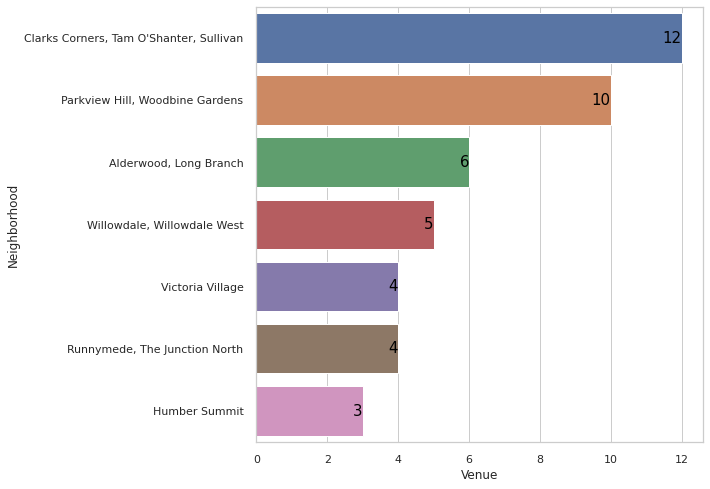

In [189]:
# Check cluster 2 neighborhoods to see how Pizza shops are represented in each of those neighborhoods
pizza_shop_c2=df_cluster2.groupby('Neighborhood')['Venue'].count().sort_values(ascending=False)[:].to_frame().reset_index()

sns.set(style="whitegrid") # Initialize the matplotlib figure 
plt.subplots(figsize=(8,8)) 
ax = sns.barplot(x='Venue', y='Neighborhood', data=pizza_shop_c2) #ax.annotate(x='Venue') 
for p in ax.patches: 
    ax.text(p.get_width(), p.get_y() + p.get_height()/2., '%d' % int(p.get_width()), fontsize=15, color='black', ha='right', va='center')

*We can see that "Clarks Corners, Tam O'Shanter, Sullivan" is a busy neighborhood with the most number of venues, this may be a great spot to open up a pizza shop. Now, let's check what % of the venues in that neighborhood is pizza shop!*

In [190]:
percent_pizza_per_neighborhood = df_cluster2[["Neighborhood","Pizza Place"]]
#percent_pizza_per_neighborhood.head() #.head() shows the first five rows only
percent_pizza_shop_ideal = percent_pizza_per_neighborhood[percent_pizza_per_neighborhood['Neighborhood'].astype(str).str.contains('Clarks Corners')] 
percent_pizza_shop_ideal.reset_index(drop=True,inplace=True) 
percent_pizza_shop_ideal.head(1)

,Neighborhood,Pizza Place
0,"Clarks Corners, Tam O'Shanter, Sullivan",0.166667


*Here is our answre: The best location to open up a pizza shop is in any of these areas since pizza representation is the lowest while they are generally busy areas*  

**Clarks Corners, Tam O'Shanter, Sullivan**